# Visualization in Matplotlib and Pandas

## Learning Objectives:
*After this lesson, you will be able to:*

* Understand the importance of using visualizations
* Identify appropriate plots for different situations.
* Create bar charts, line charts, histograms, scatterplots, and more using matplotlib


# Why are visualizations important?

[Anscombe's Quartet](https://blog.heapanalytics.com/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story/)

<img src="assets/anscombes_quartet.png" style="width: 800px;">

## Basics of Plotting

Typically, we're going to choose between one of several types of plots when trying to visually display information.

| Name | Columns | Description | Strengths | Weaknesses |
| --- | --- | --- | --- | --- |
| Bar | 1 | Shows values split by categories | Easy comparison across groups | Multiple categories can be hard to read and scaling / ordering can be tricky |
| Box | 1 | Shows data distribution for one set of data | Highlights outliers well | Can hide distribution within IQR |
| Histogram | 1 | Shows data distribution for one set of data | Potentially more truthful distribution versus Box | Bin size can dramatically affect results |
| Line | 2 | Shows changes in one value versus another | Easily show trends over some value | Requires meaningfully sorted data |
| Scatter | 2 | Compares pairwise relationships | Intuitive visualization | Scale and density affect quality |


## The Golden Rule: No Charts Named After Desserts

- No Pie Charts
- No Donut Charts
- No Exploding Variants of either of those!

Why? Ultimately it comes down to the our ability as humans to correctly gauge the relative areas of circles (or portions of circles) -- it turns out that we are very bad at doing that!

![](./assets/no_piecharts.png)

In the example above, three pie charts look almost indistinguishable from each other, yet they represent very different distributions of data. This can be alleviated if you include the percentage that each slice represents, but even that data can be more easily shown as a bar chart instead of a pie chart.

![](./assets/no_more_pies.gif)

# Examples of Bad Plots

<img src="assets/badplot_2.png">
<img src="assets/badplot_4.png">
<img src="assets/badplot_10.jpg">

## Good Visualizations


[Messie is Impossible](https://fivethirtyeight.com/features/lionel-messi-is-impossible/)

[Wind Maps](http://hint.fm/wind/)

Vizualizations gone wrong: http://viz.wtf/

# Intro to Matplotlib

Matplotlib is a well-known and comprehensive visualization library in Python. It allows virtually complete customizability for creating beautiful, elegant visualizations. 

# Demo: Building a Histogram

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/josephofiowa/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [3]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [4]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


This is an example of one of the simplest plots we can make with matplotlib. Here, we imported `matplotlib.pyplot
as plt`, and we're using `.hist()` to plot a histogram. The first argument we pass is the array we want to pass
(in this case, the beer column of the drinks DataFrame), as well as the number of bins.

To actually see the histogram, we have to run the `plt.show()` command.


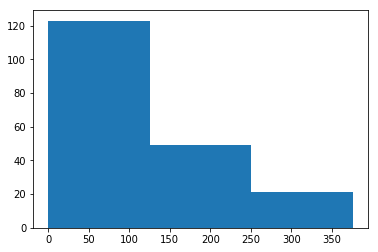

In [5]:
plt.hist(drinks['beer'],bins=3) # bins is a parameter in plt.hist(). Try changing the bins value.
plt.show()

Pandas also has built-in methods for plotting. We can use these methods by writing .plot() on the end of the pandas series we want to plot. We still have to call the matplotlib .show() method, however.

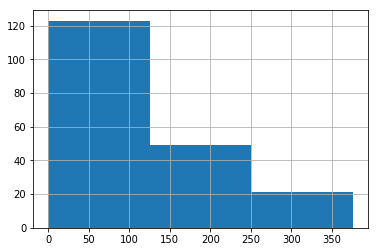

In [6]:
# I can also plot this using pandas syntax

drinks.beer.hist(bins=3)
plt.show()

## What does a histogram help us illustrate?

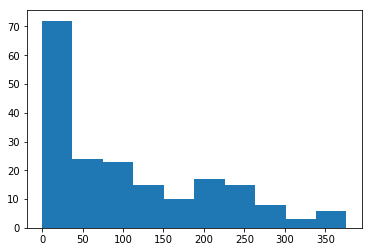

In [7]:
plt.hist(drinks['beer']) # There is a default number of bins, so we don't necessarily have to set it ourselves.
plt.show()

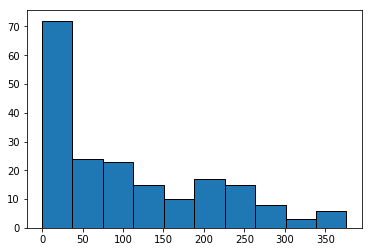

In [8]:
# Add black separating lines
plt.hist(drinks['beer'], ec='black') # Here, I'm using the ec parameter to add black lines to better identify my 
plt.show()                           # different bins

In [5]:
# We can use IPython magic to make our matplotlib visualizations higher resolution. It might not be easy to see on
# your computer screen, but when you're showing your charts on the projector, this can make a big difference.
%config InlineBackend.figure_format = 'retina'

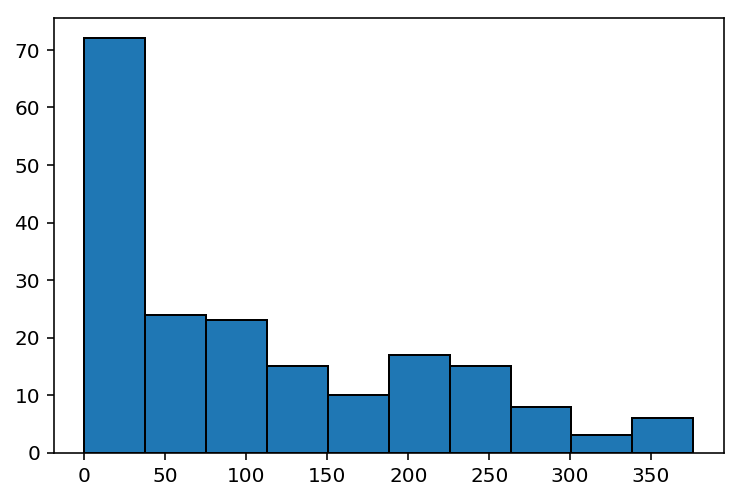

In [10]:
plt.hist(drinks['beer'],ec='black')
plt.show()

In [4]:
# This IPython magic allows us to generate figures without running plt.show()
# However, this only works in jupyter notebooks

%matplotlib inline

(array([ 72.,  24.,  23.,  15.,  10.,  17.,  15.,   8.,   3.,   6.]),
 array([   0. ,   37.6,   75.2,  112.8,  150.4,  188. ,  225.6,  263.2,
         300.8,  338.4,  376. ]),
 <a list of 10 Patch objects>)

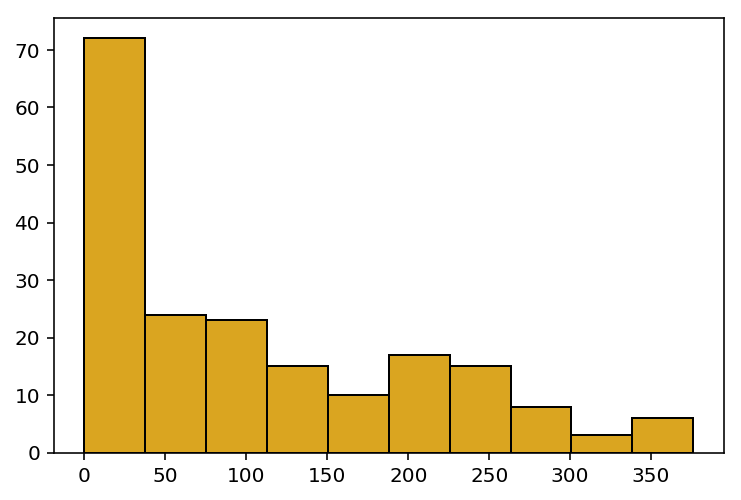

In [12]:
# We can cutomize our visualizations in almost every way imaginable.
# Let's make this an intuitive, beer-ish color. I can look up some of the available matplotlib colors here: 
# https://matplotlib.org/users/colors.html
plt.hist(drinks['beer'], ec='black', color='goldenrod')

Text(0.5,1,u'Beer Consumption')

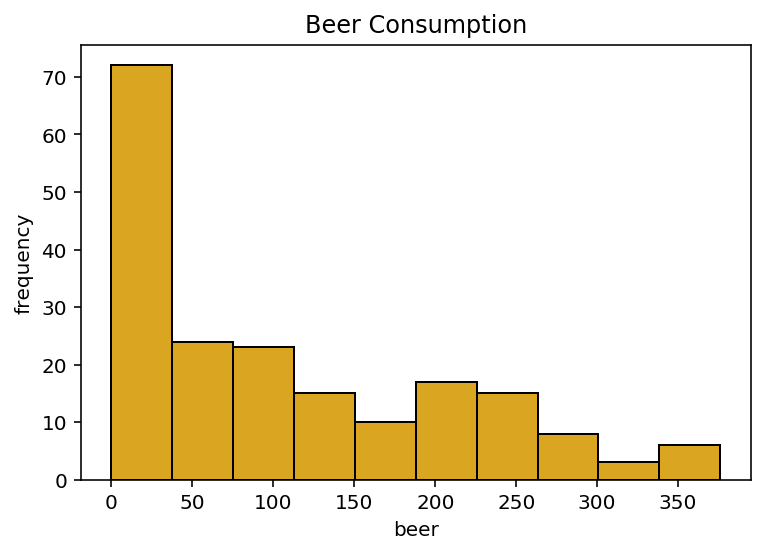

In [13]:
# Any good chart should have its axes labeled. We can do this using plt.xlabel and plt.ylabel.
# plt.title allows us to add a title. Bonus Activity: Come up with a better title than this!

plt.hist(drinks['beer'], ec='black', color='goldenrod')
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer Consumption')

In [14]:
# We can set the parameters of our visualizations (matplotlib calls them 'figures') using the rcParams method.
# Here, we're setting the figure size and the font size. We're using a tuple for the figure size because we're 
# setting both the height and width (since it's 2-dimensional).
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

Text(0.5,1,u'Beer consumption')

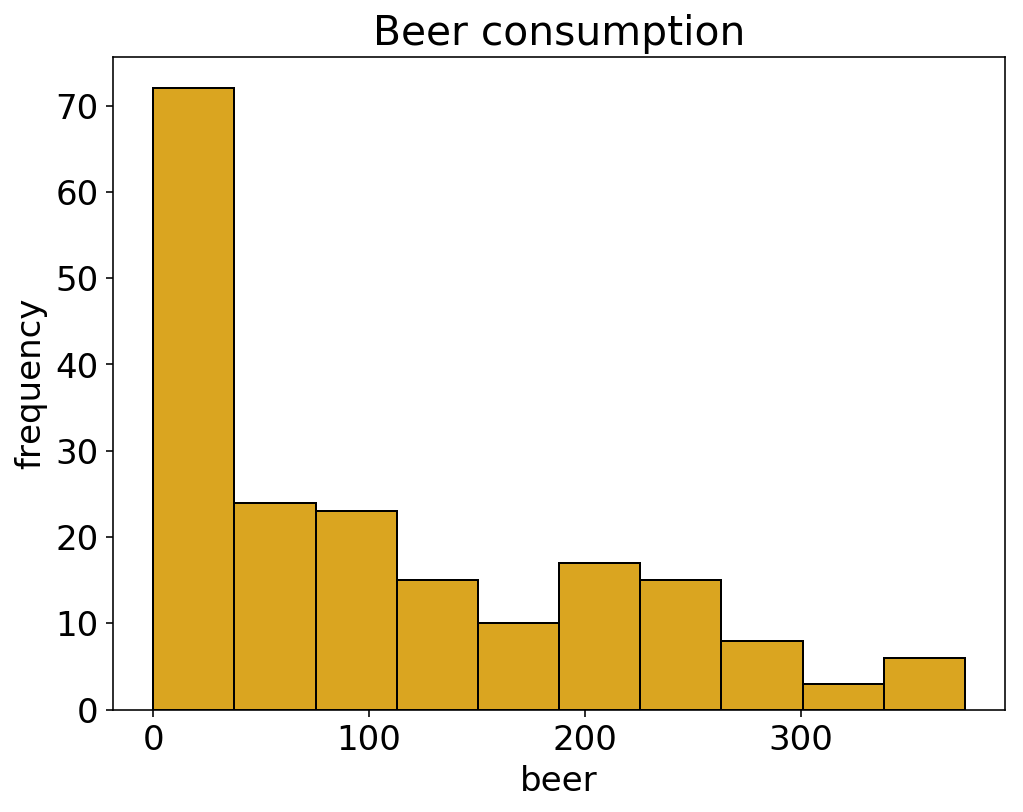

In [15]:
plt.hist(drinks['beer'], ec='black', color='goldenrod')
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

## In addition to setting visual attributes individually, matplotlib also has pre-defined styles we can use. We can see the names of all the styles by using the code below:

In [16]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

### To set a style, we can do this:

In [17]:
# Set a style for the notebook
# I like to use seaborn-white or ggplot
plt.style.use('seaborn-white')

### Try out different styles. There's even a `fivethirtyeight` style.

Text(0.5,1,u'Beer consumption')

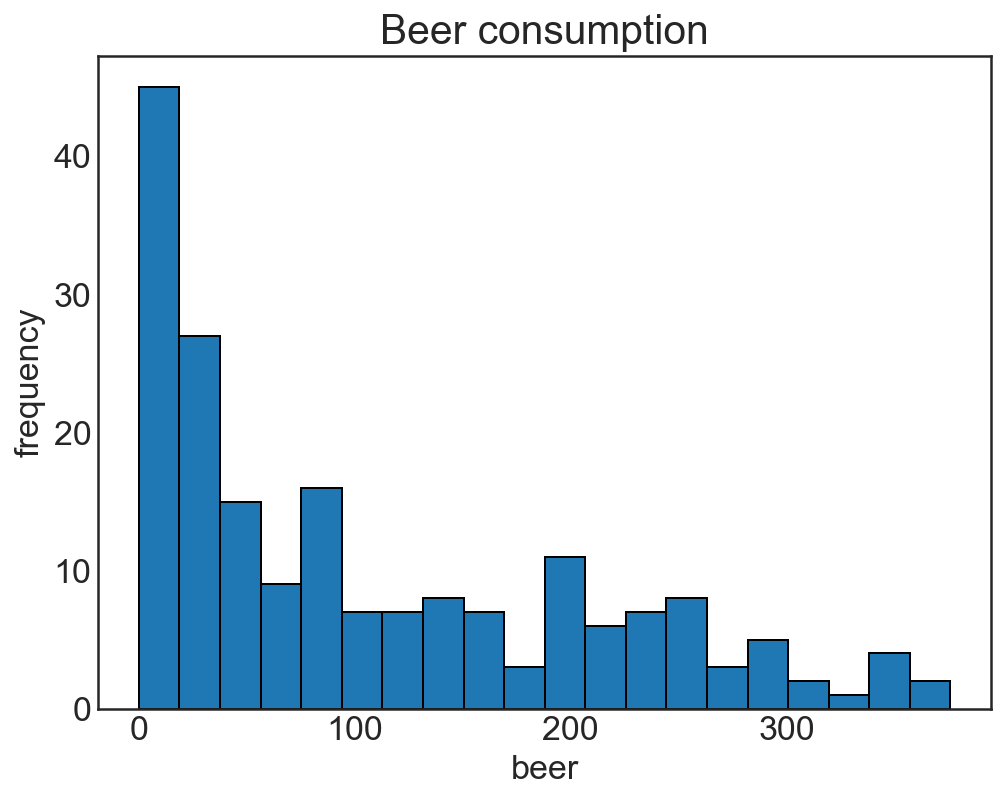

In [18]:
plt.hist(drinks['beer'], ec='black', bins=20) # If I don't specify the color now, the default is a pastel blue
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

Text(0.5,1,u'Beer consumption')

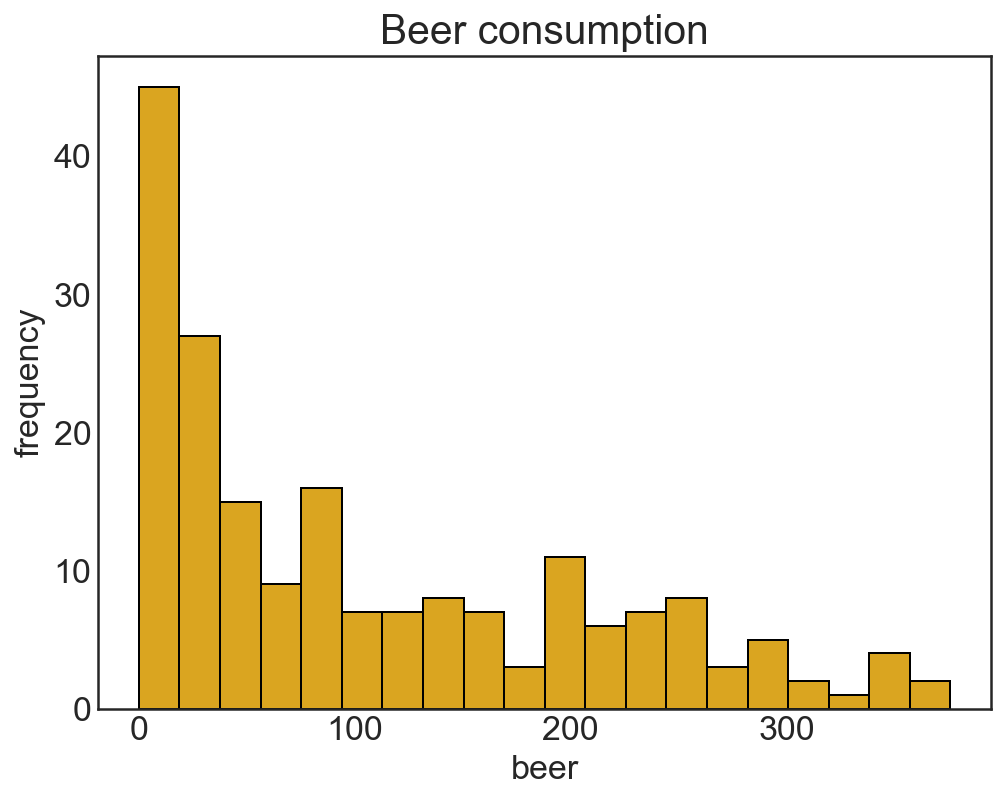

In [19]:
plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=20) # I still think goldenrod is appropriate for beer.
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

### We can plot multiple histograms (as well as other charts) on top of each other. Because I want to be able to see both of my histograms, I'm going to set the `alpha` parameter in each histogram. This parameter controls how transparent each histogram is. 

Try modifying the alpha parameters in the code below and see what happens

Text(0.5,1,u'Wine > Beer')

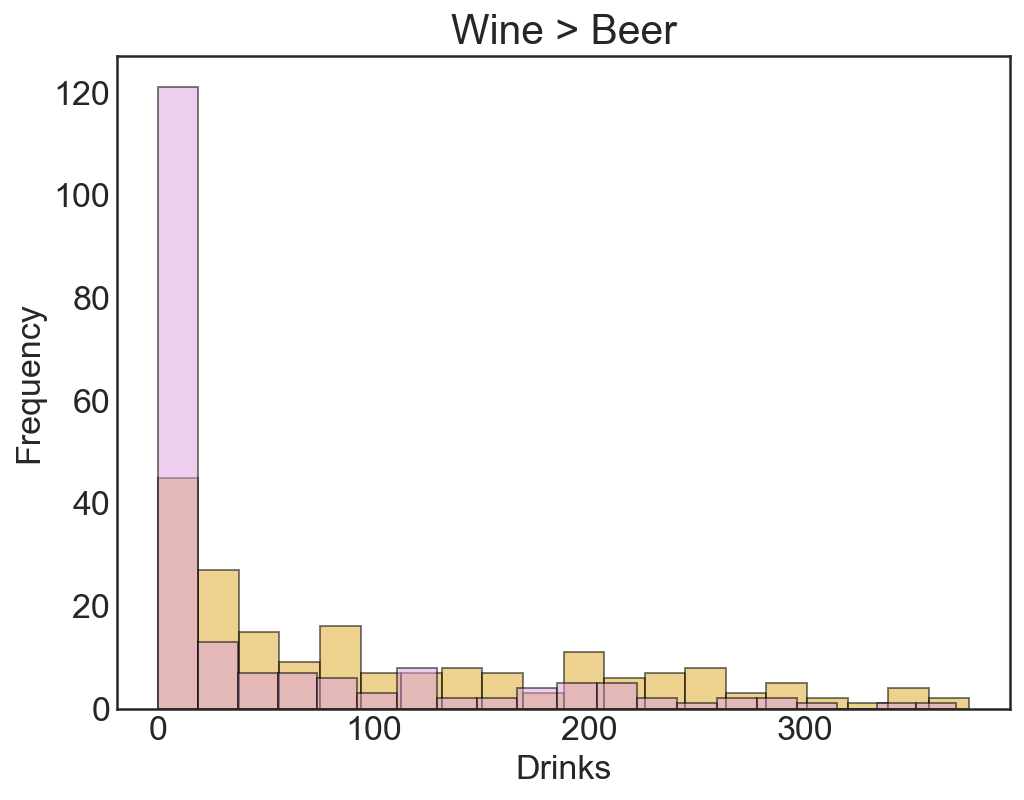

In [20]:
plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=20, alpha = 0.5)
plt.hist(drinks['wine'], ec='black', color='plum', bins=20, alpha = 0.5)
plt.xlabel('Drinks')
plt.ylabel('Frequency')
plt.title('Wine > Beer')

### Since I've got two different histograms, I want to add a legend so that the audience knows what each histogram represents. I can create this legend using the `plt.legend` method. I also have to add the `label` parameter to each of my histograms so that the legend knows what to call each histogram.

Text(0.5,1,u'Wine > Beer')

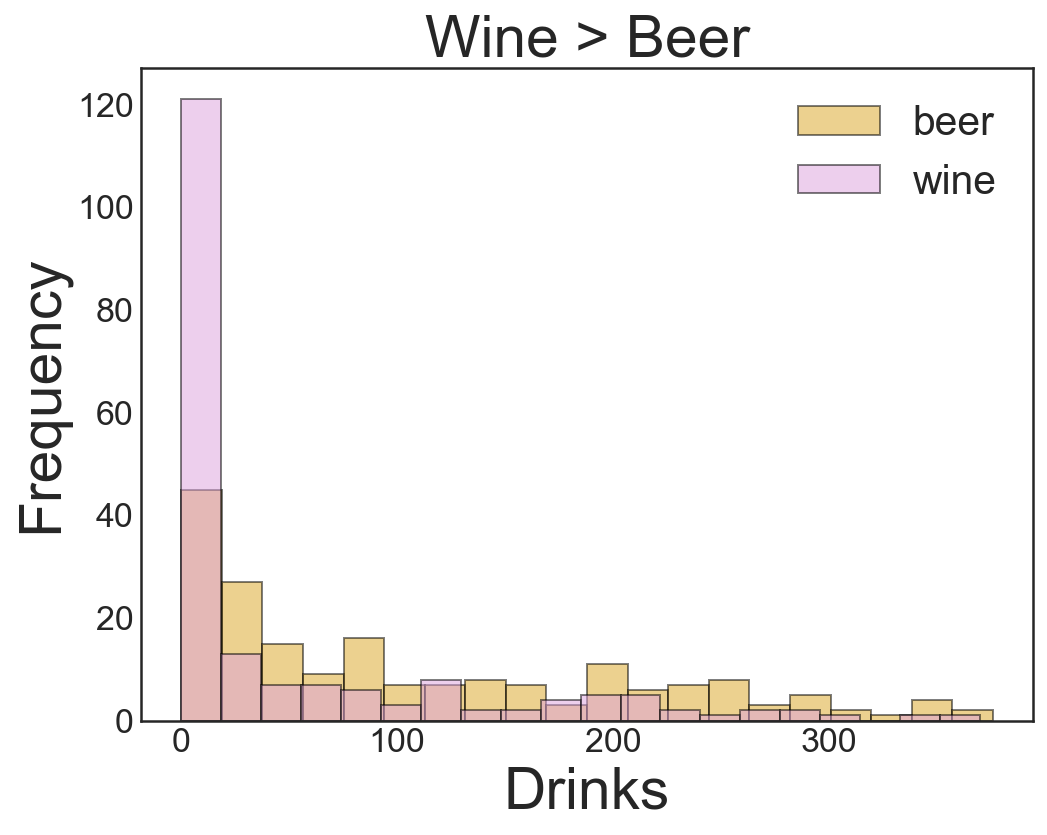

In [21]:
# Adding a legend (don't forget the labels argument in each histogram)
# Making the legend, the title, and the axes labels bigger

plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=20, alpha = 0.5, label = 'beer') # label = 'beer'
plt.hist(drinks['wine'], ec='black', color='plum', bins=20, alpha = 0.5, label = 'wine') # label = 'wine'
plt.legend(fontsize = 'large') # Legend
plt.xlabel('Drinks', fontsize = 'xx-large')
plt.ylabel('Frequency', fontsize = 'xx-large')
plt.title('Wine > Beer', fontsize = 'xx-large')

### The last thing I want to do to clean up this viz is to make the bins line up. If you notice above, the misalignment of my beer and wine histograms becomes more and more apparent the farther left we go. This is because when we specified 20 bins, matplotlib was dividing the beer and wine categories into 20 even partitions, but beer and wine have different maximums:

In [22]:
print('Max beer value: ' + str(max(drinks['beer'])))
print('Max wine value: ' + str(max(drinks['wine'])))

Max beer value: 376
Max wine value: 370


### So, for beer, matplotlib is making bins of $\frac{376}{20} = 18.8$ and for wine: $\frac{370}{20} = 18.5$

### If we want to specify not only the number of bins, but also the size of each bin, we can pass a list or array of values. When we pass the `binz` list below, we're going to tell matplotib to create bins with the boundaries specified in the `binz` list. So, the first bin will be from 0 to 20, the second one from 20 to 40, and so on.

In [23]:
binz = [i * 20 for i in range(20)]
print(binz)

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]


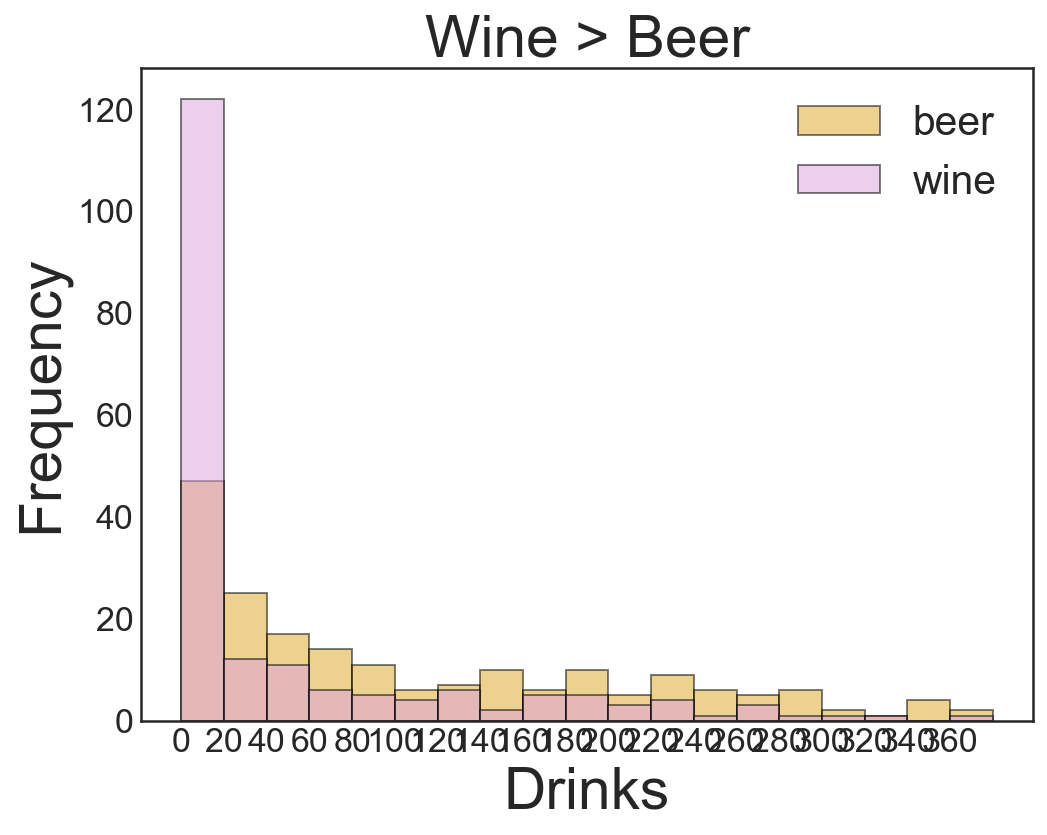

In [36]:
plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=binz, alpha = 0.5, label = 'beer')
plt.hist(drinks['wine'], ec='black', color='plum', bins=binz, alpha = 0.5, label = 'wine')
plt.legend(fontsize = 'large') # Legend
plt.xlabel('Drinks', fontsize = 'xx-large')
plt.ylabel('Frequency', fontsize = 'xx-large')
plt.title('Wine > Beer', fontsize = 'xx-large')
plt.xticks(np.arange(0, 380, 20))
plt.show()

In [ ]:
## Activity: Make the tick labels on the x-axis correspond to the lines separating every bin.
## I.e. instead of 0, 100, 200, 300, make them be 20, 40, 60, 80,...,380



## Exercise 1
We can make histograms in several ways. Make a histogram of "Sepal Width" from the Iris data set:
* Using matplotlib's `plt.hist`
* Using pandas `df.hist`
* Try plotting two histograms on top of eachother.

In [10]:
import os
iris = pd.read_csv(os.path.join("C:\Users\Nathan.y.kelmers\Desktop\ds-dc-25\2_dataset", "iris.data"), sep=',')
iris.columns

IOError: File C:\Users\Nathan.y.kelmers\Desktop\ds-dc-25_dataset\iris.data does not exist

In [31]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

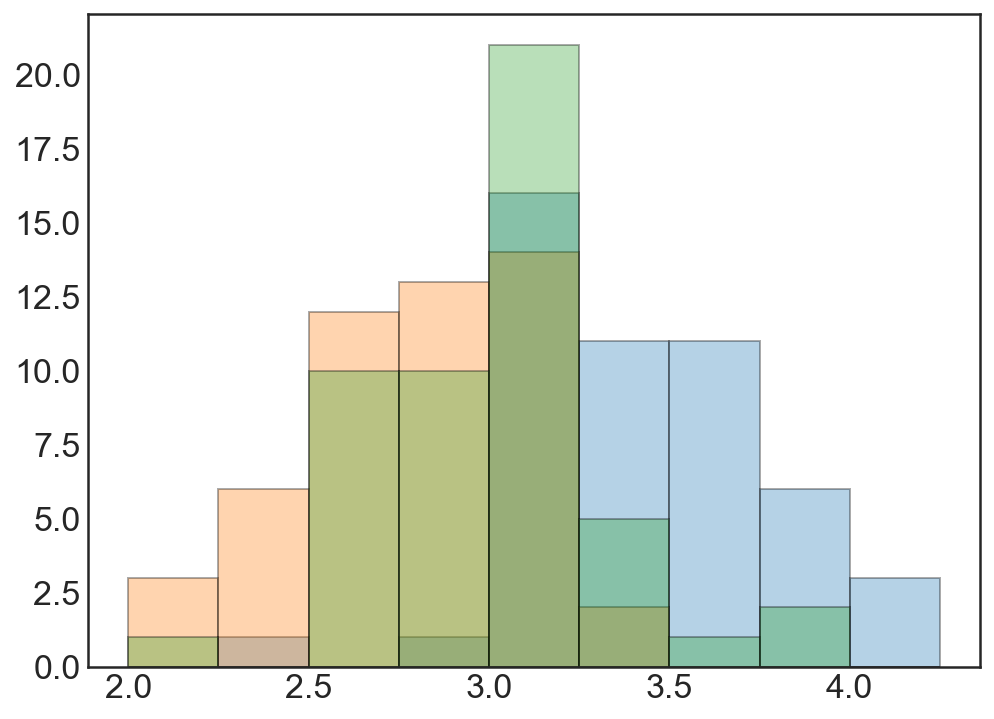

In [47]:
# Try here:

i_set = iris[iris["species"] == "Iris-setosa"].sepal_width
i_ver = iris[iris["species"] == "Iris-versicolor"].sepal_width
i_vir = iris[iris["species"] == "Iris-virginica"].sepal_width

plt.hist(i_set, ec = "black", bins = np.arange(2, 4.5, 0.25), alpha = 0.33, label = "Setosa")
plt.hist(i_ver, ec = "black", bins = np.arange(2, 4.5, 0.25), alpha = 0.33, label = "Versicolor")
plt.hist(i_vir, ec = "black", bins = np.arange(2, 4.5, 0.25), alpha = 0.33, label = "Virginica")
plt.show()

# hist(drinks['beer'], ec='black', color='goldenrod', bins=binz, alpha = 0.5, label = 'beer')

# Demo: Other plots in Matplotlib and Pandas
---
### We can make a lot more than just histograms using Matplotlib and Pandas. We'll go through a bunch of different visualizations below.

### Density plots are a smoothed version of histograms

Text(0.5,0,u'Beer')

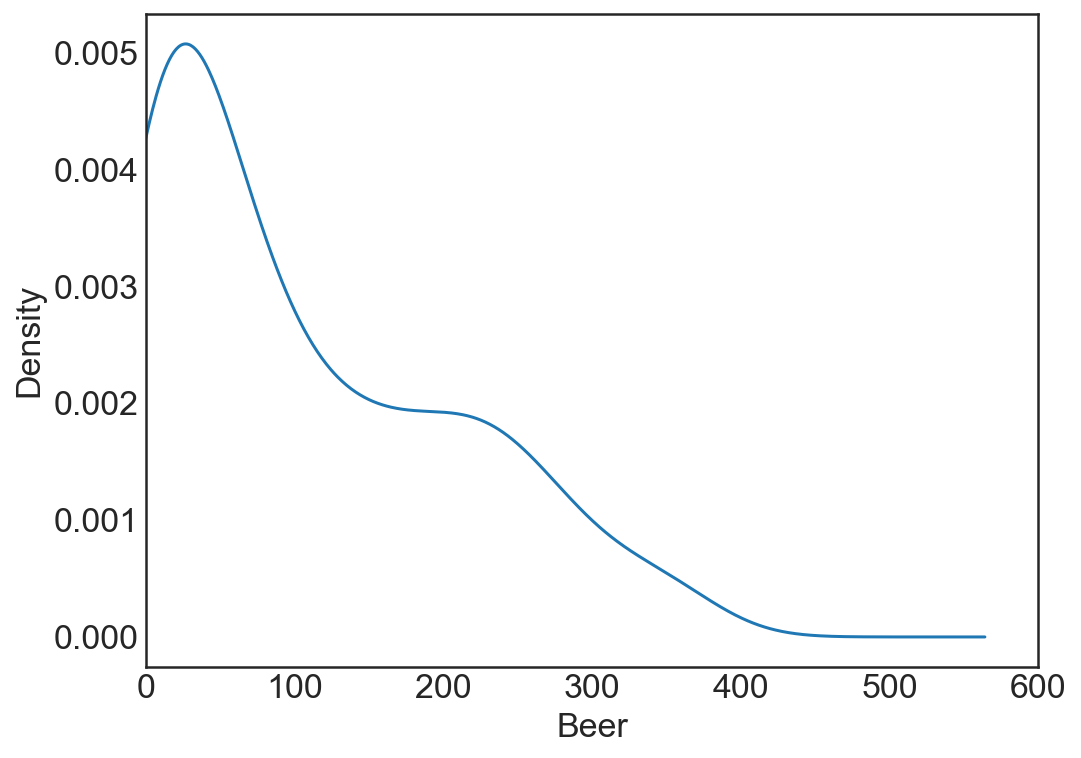

In [49]:
# Smoothed curve showing the distribution of all our observations using pandas plotting.
drinks.beer.plot(kind='density', xlim=(0, 600)) # The xlim parameter allows us to set a limit on the x-axis
plt.xlabel('Beer')

# What does this plot show us? 
# When would we want to use a density plot over a histogram?
--- 

## Scatter plots allow us to look at the relationship between two variables. In this case, we are plotting wine vs. beer, to see if there's any relationship.

(0, 400)

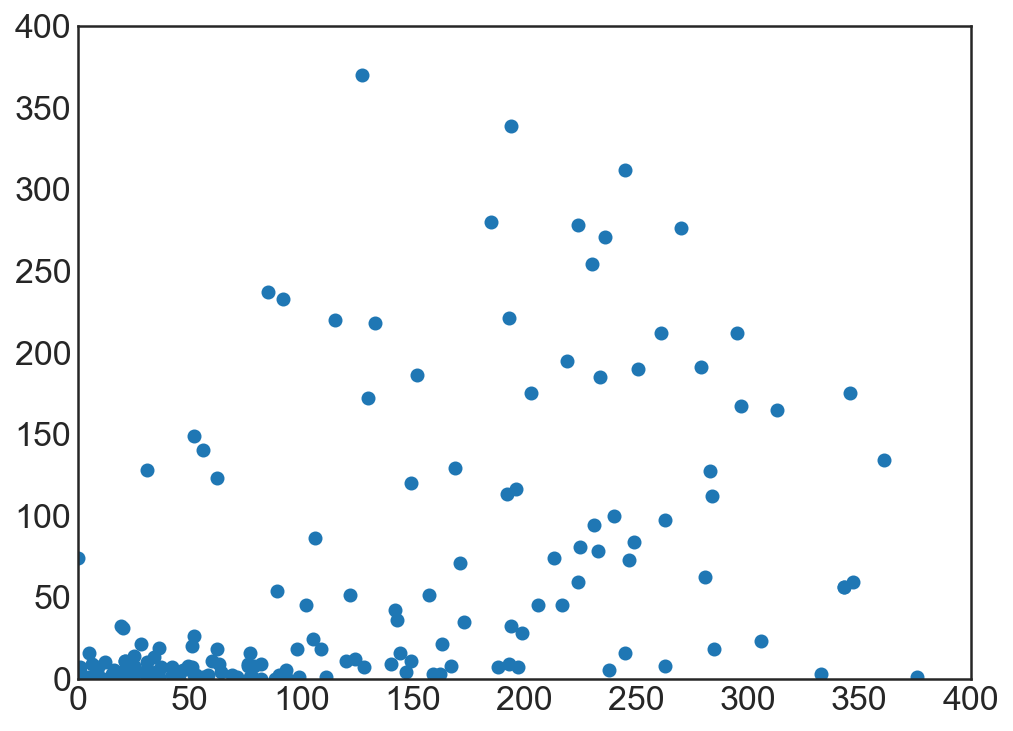

In [50]:
# Scatter plot
plt.scatter(x=drinks['beer'], y=drinks['wine'])
plt.xlim(0,400)
plt.ylim(0,400)

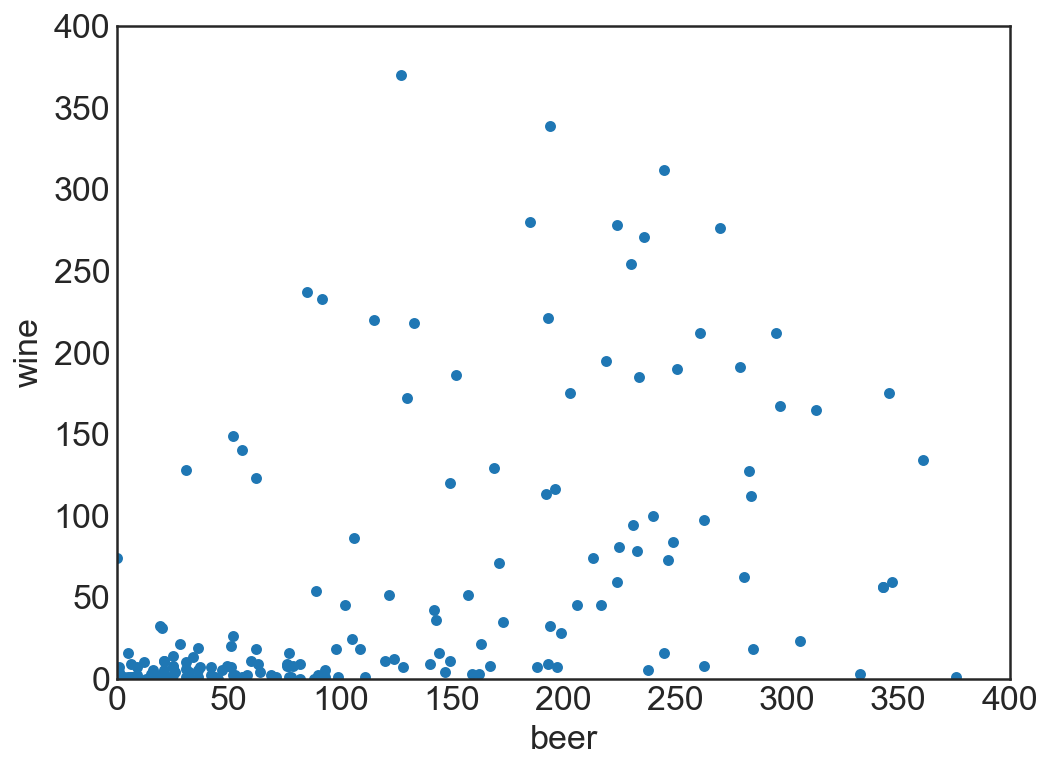

In [51]:
# Here's a way to plot the exact same thing using Pandas plotting. We specify what the x and y axes with the
# appropriately named x and y parameters

drinks.plot(kind='scatter', x='beer', y='wine', xlim=(0,400), ylim=(0,400))

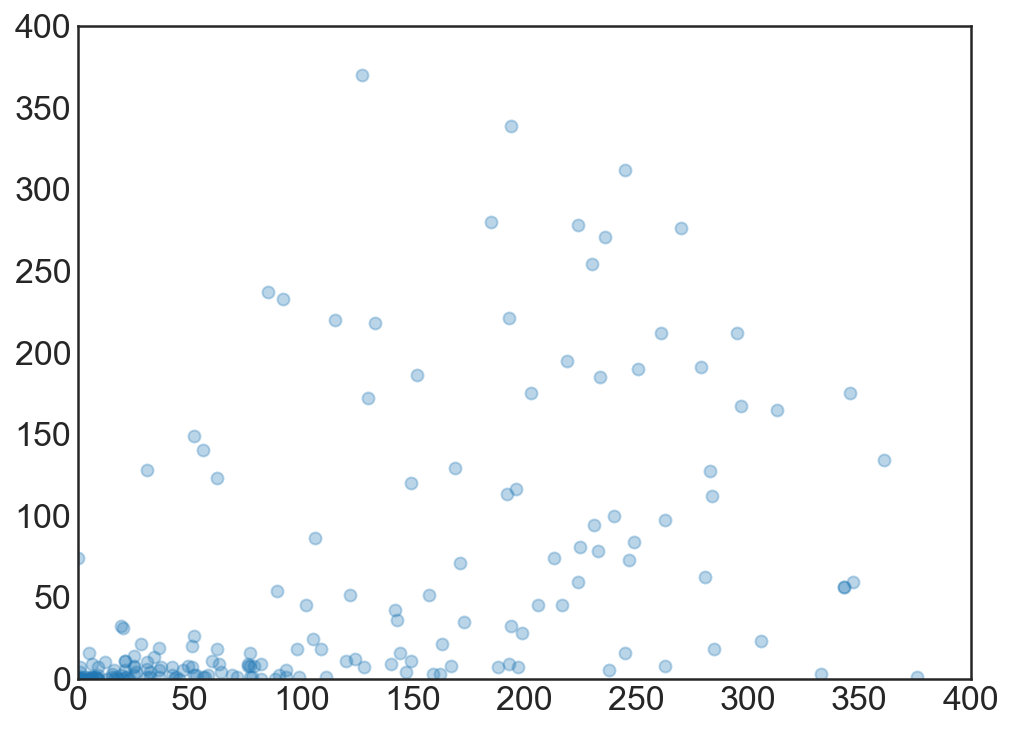

In [52]:
# Just as we did with the histograms, we can set an alpha value to make the data points more transparent so that
# we can get a better idea of where data points are clustered. The darker the points, the more data points are 
# overlapping.

plt.scatter(x=drinks['beer'], y=drinks['wine'], alpha=0.3);
plt.xlim(0,400);
plt.ylim(0,400);

## Scatterplots only plot in two dimensions, but we might want to add another dimension. One way of doing this is to add a color map. In the example below, we're coloring each data point by what the level of spirit consumption was for that observation. The more spirits a country consumed, the darker the shade of blue.

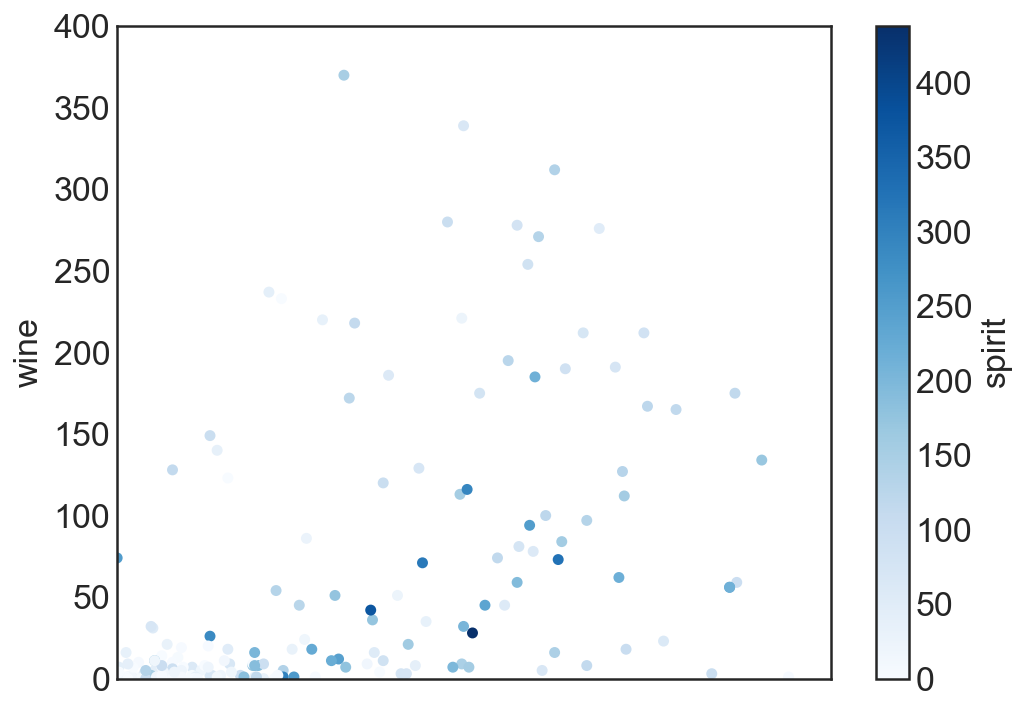

In [53]:
# Use a colormap to add another dimension to data
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues', xlim=(0,400), ylim=(0,400));

## When exploring our data, we might want to see the relationships among several variables. Pandas has a handy method for doing this called `scatter matrix`. This will output scatter plots of every single pair of variables. Along the diagonal, it will plot histograms, since there's no real reason to plot a variable against itself.

In [1]:
# Here, I'm specifying the beer, wine, and spirit columns.
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']]);

NameError: name 'pd' is not defined

# Introducing: Seaborn!
---
Seaborn is another plotting library built on top of Matplotlib that creates much more aesthetically pleasing visualizations. Standard practice is to import `seaborn` with the alias `sns`.

In [6]:
import seaborn as sns

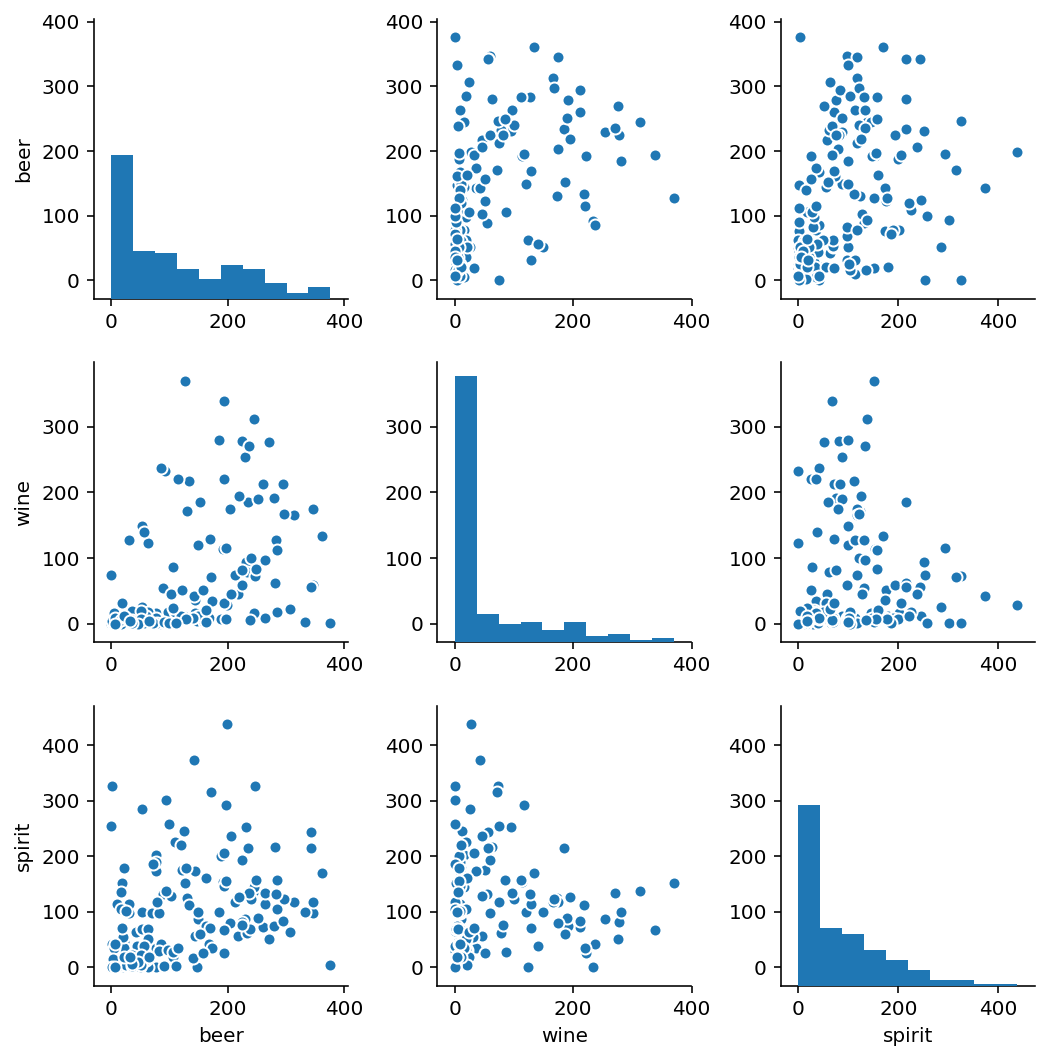

In [7]:
sns.pairplot(drinks[['beer','wine','spirit']]);

## Exercise 2:

* Using seaborn's [distplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html)

Optional: Color code the plot so 'species' are different colors

In [8]:
sns.distplot(iris["sepal_width"])



NameError: name 'iris' is not defined

In [ ]:
# Thinking back to the Pandas lecture, value_counts() counts the number of countries in each continent
drinks.continent.value_counts()

## Continents is not a continuous variable, so I can't use a histogram to plot the number of countries in each continent. If I want to see the distribution of a discrete variable like continent, I can make a bar chart.  

### Note: bar chart $\neq$ histogram

In [ ]:
drinks.continent.value_counts().plot(kind='bar');

## If I want to show multiple bar charts at the same time, I'll simply select the entire dataframe, and every column will be its on bar for each row.

In [ ]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

In [ ]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

In [ ]:
# If I don't want a certain column, I can just drop it
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar');

In [ ]:
# I can also do stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

## Exercise 

* Create a box plot for the mean `sepal_length`, `sepal_width`, and `petal_length` for each species on the same plot.

## Box Plots

### Box Plot: show quartiles (and outliers) for one or more numerical variables
Five-number summary:
* min = minimum value
* $25\%$ = first quartile ($Q_1$) = median of the lower half of the data
* $50\%$ = second quartile ($Q_2$) = median of the data
* $75\%$ = third quartile ($Q_3$) = median of the upper half of the data
* max = maximum value
(More useful than mean and standard deviation for describing skewed distributions)
Interquartile Range $(IQR) = Q_3 - Q_1$  

Outliers:  
below $Q_1 - 1.5 \times IQR$  
above $Q_3 + 1.5 \times IQR$  

In [ ]:
# show "five-number summary" for spirit
drinks.beer.describe()

In [ ]:
# compare with box plot
drinks.beer.plot(kind='box');

In [ ]:
# Include multiple variables
# Dots represent outliers
drinks.drop('liters', axis=1).plot(kind='box');

## Exercise 3

Read the seaborn page on categorical data above and make the following plots:

[swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)

[violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)
* sepal_width by category with a boxplot and a swarmplot
* petal_length by category with a violinplot and a swarmplot

## Line Plots: show the trend of a numerical variable over time

In [ ]:
# Loading in a new dataframe
url = 'https://raw.githubusercontent.com/josephofiowa/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)

In [ ]:
ufo.head()

In [ ]:
# Hmmmm, we don't want time to be a string
ufo.dtypes

In [ ]:
# Note: Why does it say the Data Types are objects when they should be strings?




In [ ]:
# Introducing datetime: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
# This may take a moment to run
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [ ]:
# Nice
ufo.dtypes

In [ ]:
ufo.head()

In [ ]:
# If we want to plot the change in a variable over time, we need to use the sort_index() method, so that our data
# are in the correct chronological order.
ufo.Year.value_counts().sort_index().plot();

## While we can use line plots for non-timeseries data, we shouldn't, since this doesn't really make any sense.

In [ ]:
drinks.continent.value_counts().plot();
#value count of every continent

## Line plots don't make sense if there's no logical order
<img src="https://s-media-cache-ak0.pinimg.com/originals/26/d8/88/26d888978d61cadf1834e10c40c0516c.jpg">

## Exercise

Make a plot that is composed of two plots, vertically stacked of:
* The closing price
* The volume

You can do this with matplotlib's [gridspec](http://matplotlib.org/users/gridspec.html).

In [ ]:
df = pd.read_csv(os.path.join("../../../ds-dc-25/2_dataset", "vti.csv"))
df.sort_values(by="Date", inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df.head()

In [ ]:
# Add code to populate plots
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1) # rows and columns
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])

ax1.plot()

ax2.plot()


In [ ]:
# Fill in the details, see http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = plt.subplots()
ax1.plot()
ax1.set_ylabel("Closing Price")

ax2 = ax1.twinx()

ax2.plot()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

plt.show()

## Back to Box Plots

In [ ]:
#what if we're trying to show one box plot for each group

#let's take a look at a box plot of beer servings again, to begin with
drinks.beer.plot(kind='box');

In [ ]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

In [ ]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

In [ ]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

## These charts look really messy. We can get each column to share the same x-axis by setting the `sharex` parameter to `True`.

In [ ]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True);

### We can do the same thing for the y-axis

In [ ]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True);

## Maybe we want 2 rows of 3 instead of 3 rows of 2. We can use the `layout` parameter and specify the number of rows and number of columns.

In [ ]:
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3));

## We've created a ton of visualizations, and they all look pretty nice in our jupyter notebooks, but we want to be able to use them in our presentations. To export a figure, we use the `plt.savefig` method to save the figure. This method will export the figure to the working directory, and you can then treat the image the same way you would any other. Remember, when naming your figure, you need to specify an extension (`.png`) so that other programs know what type of file it is.

In [ ]:
# Last but not least, saving figures:
# This will save a png of your graph in the same folder as this lecture
# Quality is not the best, I generally just take screen shots

drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

## Error bars and filled plots

Often we want to indicate that our data is noisy or contains measurement error. Let's construct a dataset.

In [ ]:
# Check: do you understand this code?
import numpy as np
from scipy import stats
import random
data = []
for i in range(50):
    m = random.randint(5 + i, 15 + i)
    s = random.randint(4, 8)
    dist = stats.norm(m, s)
    draws = dist.rvs(30)
    data.append([np.mean(draws), np.std(draws)])
df = pd.DataFrame(data, columns=["Mean", "Std"])
df.head()

In [ ]:
# Now we can plot with error bars
plt.errorbar(range(len(df)), df["Mean"], yerr=df["Std"])
plt.title("Error Bar Example")

In [ ]:
# Confidence interval: 68%
plt.errorbar(range(len(df)), df["Mean"])
lower = df["Mean"] - df["Std"]
upper = df["Mean"] + df["Std"]
plt.fill_between(range(len(df)), lower, upper, alpha=0.5)
plt.title("CI Example")


## Exercises
For each of the remaining data sets:
* [Abalone Dataset](http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all) Various measurements of a type of snail
* [Boston Housing](https://archive.ics.uci.edu/ml/datasets/Housing) Housing prices alone with various supplemental data, such as local crime rates
* [Motor Trend Cars](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
* [Salary Data](https://archive.ics.uci.edu/ml/datasets/Adult)

Work through the following exercises:
* Make a pairplot on a subset of four categories (if possible). Use the vars=["column1", "columnb", ..] to prevent seaborn from making too many plots
* Pick two continuous variables and make a scatter plot with matplotlib, a density plot with seaborn, and a joint plot with seaborn
* If there are any categorical variables, make boxplots and violin plots for each of the categorical variables
* Make at least one plot that has dual-axes or two stacked plots

Feel free to try to make any other plots that might seem interesting! If so please share with the class.

# Exercises

Pick one of the [datasets available here](https://github.com/mwaskom/seaborn-data), such as the exoplanets dataset planets.csv or the diet and exercise data set exercise.csv (or another). Practice the plots you learned above and try to make an awesome plot.

If you need some ideas on different types of plots, checkout:
* The [seaborn gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)
* The [matplotlib gallery](http://matplotlib.org/gallery.html)


# Conclusion:
---
We've only dipped our toes in the water of data visualization. There's tons more you can do with Matplotlib, Seaborn, and Pandas. There are also more visualization libraries out there. The last thing I'll leave you with is this diagram of several of the elements of a matplotlib figure. Everything below is generated by code, including all the annotations.

In [ ]:
# This figure shows the name of several matplotlib elements composing a figure
# https://matplotlib.org/examples/showcase/anatomy.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

# Resources:

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[DataCamp Intro to Visualization](https://campus.datacamp.com/courses/introduction-to-data-visualization-with-python/)

[pythonprogramming.net](https://pythonprogramming.net/matplotlib-intro-tutorial/)

[Seaborn Documentations](http://seaborn.pydata.org/)

[Simple Plotting Tutorials from Matplotlib Documentation](https://matplotlib.org/users/pyplot_tutorial.html)

[Pandas plotting documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
